In [51]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

train= pd.read_csv("fraudTrain.csv")
test= pd.read_csv("fraudTest.csv")

data=pd.concat([train,test])
data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,5.371934e+05,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,3.669110e+05,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,2.315490e+05,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,4.630980e+05,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,8.335758e+05,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [52]:
print(train.shape)
print(test.shape)

(1296675, 23)
(555719, 23)


In [53]:
display(data.head())
print(data.describe())
print(data.isnull().sum())


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


         Unnamed: 0        cc_num           amt           zip           lat  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean   5.371934e+05  4.173860e+17  7.006357e+01  4.881326e+04  3.853931e+01   
std    3.669110e+05  1.309115e+18  1.592540e+02  2.688185e+04  5.071470e+00   
min    0.000000e+00  6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01   
25%    2.315490e+05  1.800429e+14  9.640000e+00  2.623700e+04  3.466890e+01   
50%    4.630980e+05  3.521417e+15  4.745000e+01  4.817400e+04  3.935430e+01   
75%    8.335758e+05  4.642255e+15  8.310000e+01  7.204200e+04  4.194040e+01   
max    1.296674e+06  4.992346e+18  2.894890e+04  9.992100e+04  6.669330e+01   

               long      city_pop     unix_time     merch_lat    merch_long  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean  -9.022783e+01  8.864367e+04  1.358674e+09  3.853898e+01 -9.022794e+01   
std    1.374789e+01  3.014876e+05  1.819508e+07  5.

In [54]:
test.info

<bound method DataFrame.info of         Unnamed: 0 trans_date_trans_time            cc_num  \
0                0   2020-06-21 12:14:25  2291163933867244   
1                1   2020-06-21 12:14:33  3573030041201292   
2                2   2020-06-21 12:14:53  3598215285024754   
3                3   2020-06-21 12:15:15  3591919803438423   
4                4   2020-06-21 12:15:17  3526826139003047   
...            ...                   ...               ...   
555714      555714   2020-12-31 23:59:07    30560609640617   
555715      555715   2020-12-31 23:59:09  3556613125071656   
555716      555716   2020-12-31 23:59:15  6011724471098086   
555717      555717   2020-12-31 23:59:24     4079773899158   
555718      555718   2020-12-31 23:59:34  4170689372027579   

                                    merchant        category     amt    first  \
0                      fraud_Kirlin and Sons   personal_care    2.86     Jeff   
1                       fraud_Sporer-Keebler   personal_care 

In [55]:
train.info

<bound method DataFrame.info of          Unnamed: 0 trans_date_trans_time               cc_num  \
0                 0   2019-01-01 00:00:18     2703186189652095   
1                 1   2019-01-01 00:00:44         630423337322   
2                 2   2019-01-01 00:00:51       38859492057661   
3                 3   2019-01-01 00:01:16     3534093764340240   
4                 4   2019-01-01 00:03:06      375534208663984   
...             ...                   ...                  ...   
1296670     1296670   2020-06-21 12:12:08       30263540414123   
1296671     1296671   2020-06-21 12:12:19     6011149206456997   
1296672     1296672   2020-06-21 12:12:32     3514865930894695   
1296673     1296673   2020-06-21 12:13:36     2720012583106919   
1296674     1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutman

In [56]:
from sklearn.preprocessing import LabelEncoder

label_encode_cols =['merchant','category','gender','state','job']

label_encoders= {col: LabelEncoder() for col in label_encode_cols}

for col in label_encode_cols:
    data[col] = label_encoders[col].fit_transform(data[col])
    train[col] = label_encoders[col].transform(train[col])
    test[col] = label_encoders[col].transform(test[col])

date_cols = ['trans_date_trans_time','dob']

for col in date_cols:
    data[col]=pd.to_datetime(data[col])
    data[col + '_year']=data[col].dt.year
    data[col +'_month']=data[col].dt.month
    data[col + '_day'] = data[col].dt.day
    data[col+ '_hour']= data[col].dt.hour
    data.drop(col,axis=1,inplace=True)
#dropping unnecessary columns
cols_to_drop=['first','last','street','city','trans_num']
data.drop(cols_to_drop,axis=1,inplace=True)
train.drop(cols_to_drop,axis=1,inplace=True)
test.drop(cols_to_drop,axis=1,inplace=True)


In [57]:
print(train.shape)
print(test.shape)
print(data.shape)


(1296675, 18)
(555719, 18)
(1852394, 24)


In [58]:
print(data.head(0))
print(data.head())
print(data.describe())
print(data.isnull().sum())


Empty DataFrame
Columns: [Unnamed: 0, cc_num, merchant, category, amt, gender, state, zip, lat, long, city_pop, job, unix_time, merch_lat, merch_long, is_fraud, trans_date_trans_time_year, trans_date_trans_time_month, trans_date_trans_time_day, trans_date_trans_time_hour, dob_year, dob_month, dob_day, dob_hour]
Index: []

[0 rows x 24 columns]
   Unnamed: 0            cc_num  merchant  category     amt  gender  state  \
0           0  2703186189652095       514         8    4.97       0     27   
1           1      630423337322       241         4  107.23       0     47   
2           2    38859492057661       390         0  220.11       1     13   
3           3  3534093764340240       360         2   45.00       1     26   
4           4   375534208663984       297         9   41.96       1     45   

     zip      lat      long  ...  merch_long  is_fraud  \
0  28654  36.0788  -81.1781  ...  -82.048315         0   
1  99160  48.8878 -118.2105  ... -118.186462         0   
2  83252  4

         Unnamed: 0        cc_num      merchant      category           amt  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean   5.371934e+05  4.173860e+17  3.429269e+02  6.230569e+00  7.006357e+01   
std    3.669110e+05  1.309115e+18  2.010519e+02  3.913273e+00  1.592540e+02   
min    0.000000e+00  6.041621e+10  0.000000e+00  0.000000e+00  1.000000e+00   
25%    2.315490e+05  1.800429e+14  1.660000e+02  3.000000e+00  9.640000e+00   
50%    4.630980e+05  3.521417e+15  3.460000e+02  6.000000e+00  4.745000e+01   
75%    8.335758e+05  4.642255e+15  5.140000e+02  1.000000e+01  8.310000e+01   
max    1.296674e+06  4.992346e+18  6.920000e+02  1.300000e+01  2.894890e+04   

             gender         state           zip           lat          long  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean   4.521959e-01  2.666711e+01  4.881326e+04  3.853931e+01 -9.022783e+01   
std    4.977097e-01  1.432946e+01  2.688185e+04  5.

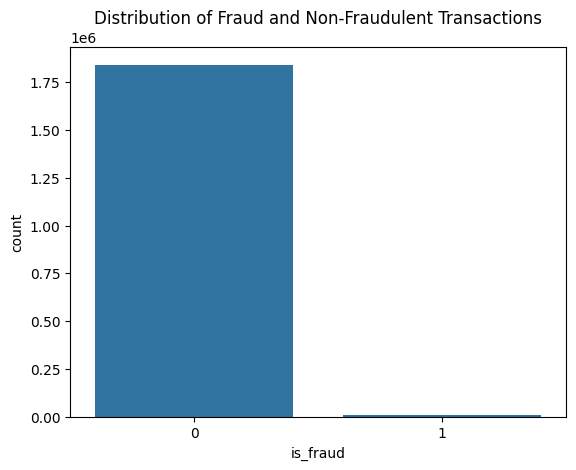

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=data, x='is_fraud')
plt.title('Distribution of Fraud and Non-Fraudulent Transactions')
plt.show()


In [60]:
print(data.index.duplicated().sum())
data= data.reset_index(drop=True)
print(data.index.duplicated().sum())

555719
0


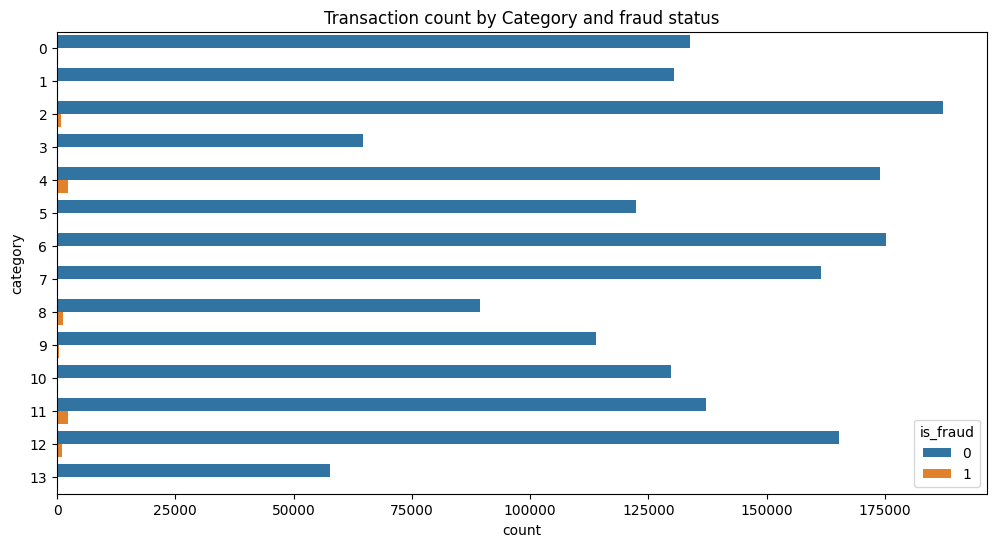

In [61]:
plt.figure(figsize=(12,6))
sns.countplot(data=data,y='category',hue='is_fraud')
plt.title('Transaction count by Category and fraud status')
plt.xticks(rotation=0)
plt.show()

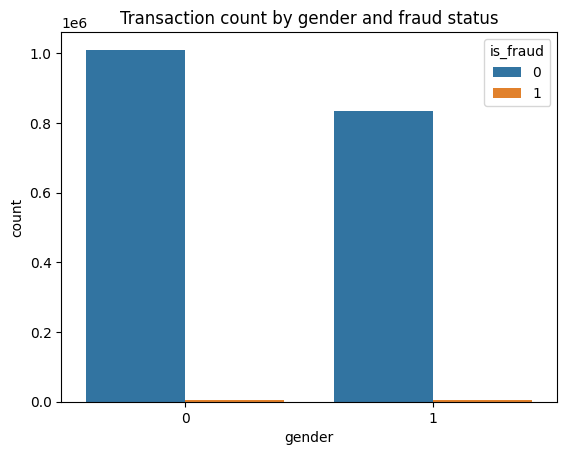

In [62]:
sns.countplot(data=data,x='gender',hue='is_fraud')
plt.title('Transaction count by gender and fraud status')
plt.show()

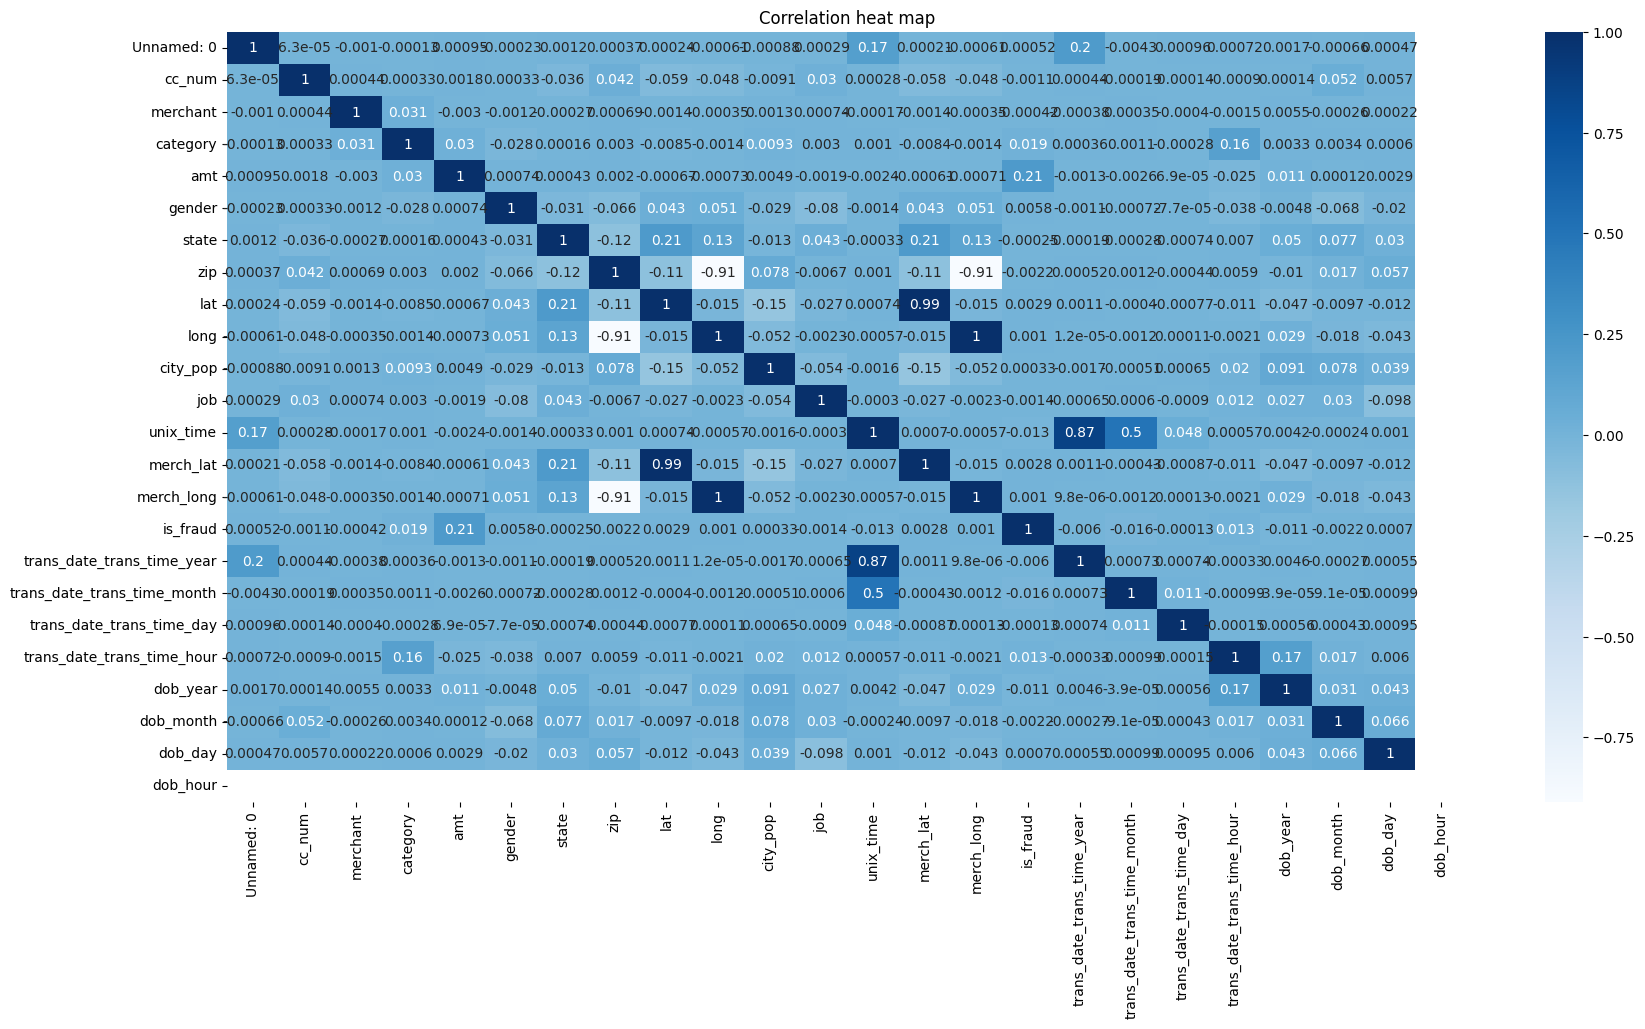

In [63]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,cmap='Blues')
plt.title('Correlation heat map')
plt.show()

In [64]:
X=data.drop('is_fraud',axis=1)
y=data['is_fraud']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [65]:
#Training The Model For Logistic Regression
log_model=LogisticRegression(max_iter=1000)
log_model.fit(X_train,y_train)
y_pred=log_model.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Accuracy: ",accuracy_score(y_test,y_pred))


c:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00    368526
           1       0.00      0.00      0.00      1953

    accuracy                           0.99    370479
   macro avg       0.50      0.50      0.50    370479
weighted avg       0.99      0.99      0.99    370479

[[368526      0]
 [  1953      0]]
Accuracy:  0.9947284461467452


In [66]:
#Training The model For Decision Tree Classifier
tree_model=DecisionTreeClassifier()
tree_model.fit(X_train,y_train)
y_pred=tree_model.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Accuracy : ",accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368526
           1       0.79      0.84      0.82      1953

    accuracy                           1.00    370479
   macro avg       0.90      0.92      0.91    370479
weighted avg       1.00      1.00      1.00    370479

[[368101    425]
 [   315   1638]]
Accuracy :  0.9980025858415726
